<a href="https://colab.research.google.com/github/SuvarshaChennareddy/Zeotap-Data-Science-Assignment/blob/main/Suvarsha_Chennareddy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the data
customers_df = pd.read_csv('/content/drive/MyDrive/Zeotap/Customers.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Zeotap/Products.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/Zeotap/Transactions.csv')

In [3]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


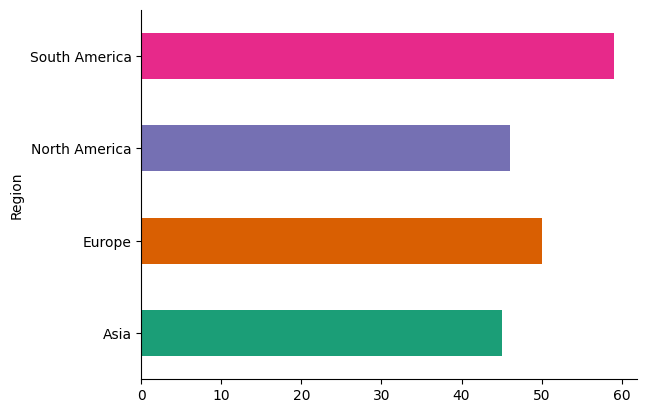

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
customers_df.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


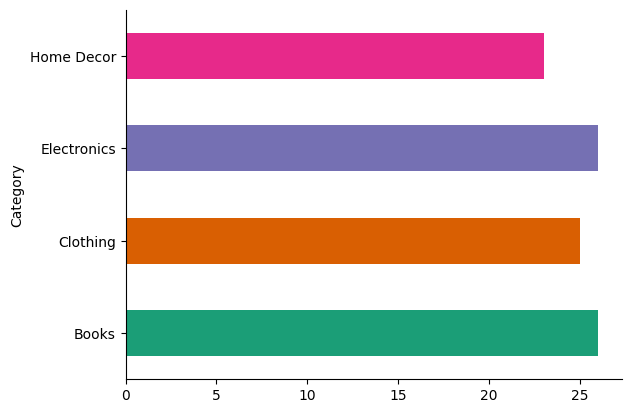

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
products_df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

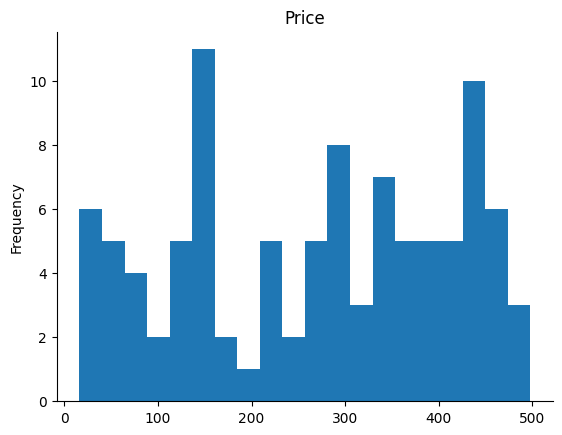

In [7]:
from matplotlib import pyplot as plt
products_df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-8-630f175090f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(products_df, x='Price', y='Category', inner='stick', palette='Dark2')


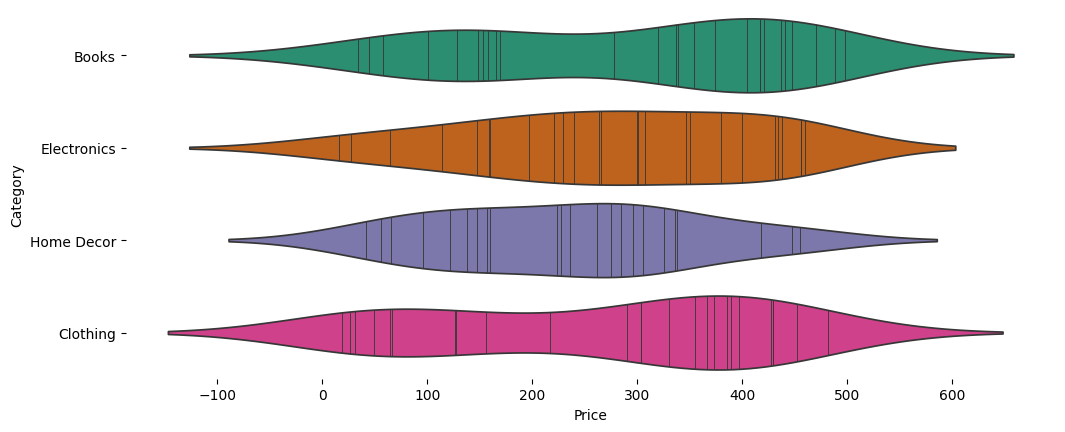

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(products_df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(products_df, x='Price', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


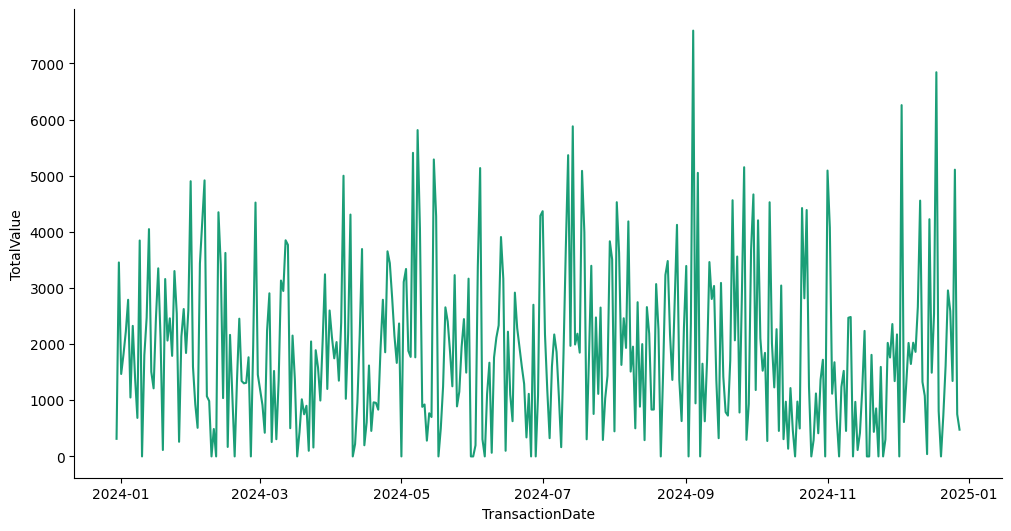

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'transactions_df' has a 'TransactionDate' column of datetime type
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Resample to daily frequency and sum TotalValue for each day
daily_transactions = transactions_df.resample('D', on='TransactionDate')['TotalValue'].sum().reset_index()

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TransactionDate']
  ys = series['TotalValue']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
_plot_series(daily_transactions, '')  # Plot the resampled data
sns.despine(fig=fig, ax=ax)
plt.xlabel('TransactionDate')
_ = plt.ylabel('TotalValue')

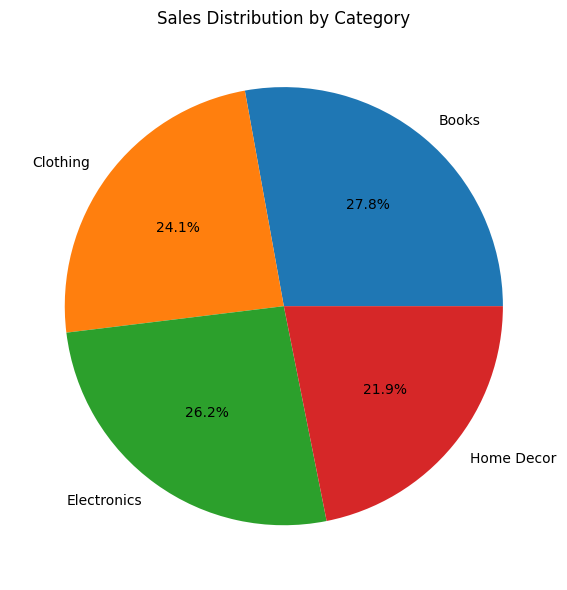

In [11]:
# 3. Transaction Analysis
transactions_with_info = pd.merge(
    transactions_df,
    products_df[['ProductID', 'Category']],
    on='ProductID'
)

plt.figure(figsize=(12, 6))
sales_by_category = transactions_with_info.groupby('Category')['TotalValue'].sum()
plt.pie(sales_by_category.values, labels=sales_by_category.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Category')
plt.tight_layout()
plt.show()

<ipython-input-12-0537c9aae964>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_signups = customers_df.set_index('SignupDate').resample('M').size()


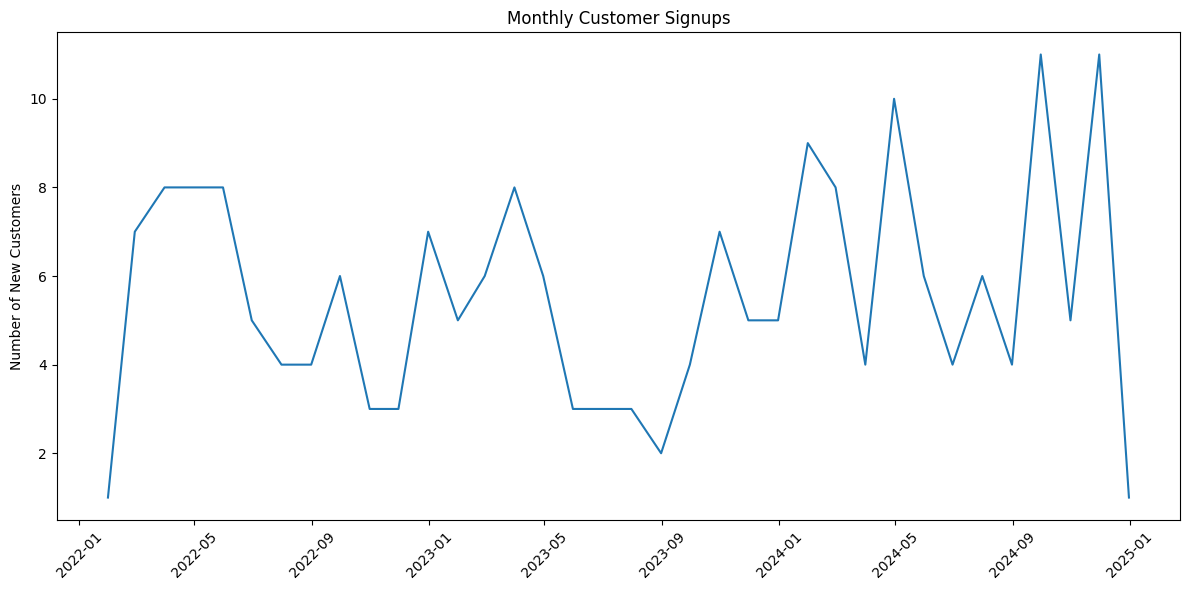

In [12]:
# 5. Customer Acquisition Analysis
# Convert 'SignupDate' to datetime before setting it as index
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
monthly_signups = customers_df.set_index('SignupDate').resample('M').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_signups.index, monthly_signups.values)
plt.title('Monthly Customer Signups')
plt.xticks(rotation=45)
plt.ylabel('Number of New Customers')
plt.tight_layout()
plt.show()

In [13]:
# Key Statistics
print("\nKey Statistics:")

print(f"Total Customers: {len(customers_df)}")

print(f"Total Products: {len(products_df)}")

print(f"Total Transactions: {len(transactions_df)}")

print(f"\nAverage Transaction Value: ${transactions_df['TotalValue'].mean():.2f}")

print(f"Most Common Product Categories: {list(products_df['Category'].mode())}")

print(f"Most Active Regions: {list(customers_df['Region'].mode())}")


Key Statistics:
Total Customers: 200
Total Products: 100
Total Transactions: 1000

Average Transaction Value: $690.00
Most Common Product Categories: ['Books', 'Electronics']
Most Active Regions: ['South America']
